# DRIVEN DATA: The Tanzanian Water Crisis

Author: Namita Rana

## Overview
Tanzania, as a developing country, struggles with providing clean water to its population of over 57,000,000. There are many water points already established in the country, but some are in need of repair while others have failed altogether.
As a result, many people are suffering. In this project, the objective is to dive into this crisis, focusing on the analysis of water well functionality accross the country in order to assess the level of the crisis and explore some possible solutions towards improving the situation for millions of people.

## Business Problem: 
Almost half the population of Tanzania is without basic access to safe water. Although there are many waterpoints already established in the country, a lot of them are in need of repair while others have failed altogether.
It can assist the Tanzanian Ministry of Water on identifying pumps that are in need of repair and/or no longer functional.Understanding which pumps will fail and which will not may help improve maintenance operations and ensure that clean water is available to people residing in Tanzania.
Note that this is a ternary classification problem by default, but can be engineered to be binary.
Stakeholder: Ministry of Water and Irrigation,Goverment of Tanzania.



## Dataset

The dataset provided on https://www.drivendata.org/ by Taarifa and the Tanzanian Ministry of Water. 

For this dataset, there are two subsections to the problem description:

#### Features
* List of features

#### Labels
* List of labels

### The features in this dataset are:
* amount_tsh - Total static head (amount water available to waterpoint)
* date_recorded - The date the row was entered
* funder - Who funded the well
* gps_height - Altitude of the well
* installer - Organization that installed the well
* longitude - GPS coordinate
* latitude - GPS coordinate
* wpt_name - Name of the waterpoint if there is one
* num_private -
* basin - Geographic water basin
* subvillage - Geographic location
* region - Geographic location
* region_code - Geographic location (coded)
* district_code - Geographic location (coded)
* lga - Geographic location
* ward - Geographic location
* population - Population around the well
* public_meeting - True/False
* recorded_by - Group entering this row of data
* scheme_management - Who operates the waterpoint
* scheme_name - Who operates the waterpoint
* permit - If the waterpoint is permitted
* construction_year - Year the waterpoint was constructed
* extraction_type - The kind of extraction the waterpoint uses
* extraction_type_group - The kind of extraction the waterpoint uses
* extraction_type_class - The kind of extraction the waterpoint uses
* management - How the waterpoint is managed
* management_group - How the waterpoint is managed
* payment - What the water costs
* payment_type - What the water costs
* water_quality - The quality of the water
* quality_group - The quality of the water
* quantity - The quantity of water
* quantity_group - The quantity of water
* source - The source of the water
* source_type - The source of the water
* source_class - The source of the water
* waterpoint_type - The kind of waterpoint
* waterpoint_type_group - The kind of waterpoint


The labels in this dataset:
* Functional
* Non Functional
* Functional but needs repair.


### Data Structure, Selection & Transformation:

The raw dataset contains 60,000 water pumps and 40 different features. Combining feature selection and engineering we reduced the dataset to 14 features. We are using Functional / Non-Functional/Functional but needs repair as our target. We made some additional small features changes to simplify the dataset detailed in the Main jupyter notebook. 

### Methods

 #### Cleaning and Feature Engineering

This project uses data cleaning and feature engineering to also addressed the class imbalance between classes we have used SMOTE. We also cleaned up our data, as there were missing values in multiple columns. For example, if "construction year" of the waterpoint had a missing value, we filled that value with the mean construction year of all waterpoints within that given region. We also engineered one column "age" to equal the age of the waterpoint when the data was collected. Cleaning our data and building these features helped make our model more interpretable and significant.

#### Models Development

Classification  was used in order to predict the status level of a pump. We trained four separate classifier models: K-Nearest Neighbor, Decision Trees,Random Forest, and XGBoost. Knn was our simplest model, and we tuned our models to get the best results.

#### Results

Our simplest model,XGBoost came back with a confusion matrix that produced a 82% accuracy score and a 86% precision score. For our purposes, we were looking to maximize precision as we want to reduce the amount of False positives (predicting the pump as non- functional when it is functional).

## Importing the libraries.

In [1]:
#import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from scipy import stats
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.impute import KNNImputer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn import svm
from sklearn.metrics import f1_score, balanced_accuracy_score, plot_confusion_matrix, classification_report

## Import the data

In [2]:
#obtain the data and read the file.
df = pd.read_csv('Tanzanian_WellDataset.csv', index_col= False)
df

id  amount_tsh date_recorded           funder  gps_height  \
0      69572      6000.0    2011-03-14            Roman        1390   
1       8776         0.0    2013-03-06          Grumeti        1399   
2      34310        25.0    2013-02-25     Lottery Club         686   
3      67743         0.0    2013-01-28           Unicef         263   
4      19728         0.0    2011-07-13      Action In A           0   
...      ...         ...           ...              ...         ...   
59395  60739        10.0    2013-05-03  Germany Republi        1210   
59396  27263      4700.0    2011-05-07      Cefa-njombe        1212   
59397  37057         0.0    2011-04-11              NaN           0   
59398  31282         0.0    2011-03-08            Malec           0   
59399  26348         0.0    2011-03-23       World Bank         191   

          installer  longitude   latitude              wpt_name  num_private  \
0             Roman  34.938093  -9.856322                  none            0   
1           GRUMETI  34.698766  -2.147466              Zahanati            0   
2      World vision  37.460664  -3.821329           Kwa Mahundi            0   
3            UNICEF  38.486161 -11.155298  Zahanati Ya Nanyumbu            0   
4           Artisan  31.130847  -1.825359               Shuleni            0   
...             ...        ...        ...                   ...          ...   
59395           CES  37.169807  -3.253847   Area Three Namba 27            0   
59396          Cefa  35.249991  -9.070629     Kwa Yahona Kuvala            0   
59397           NaN  34.017087  -8.750434               Mashine            0   
59398          Musa  35.861315  -6.378573                Mshoro            0   
59399         World  38.104048  -6.747464       Kwa Mzee Lugawa            0   

       ... water_quality quality_group      quantity  quantity_group  \
0      ...          soft          good        enough          enough   
1      ...          soft          good  insufficient    insufficient   
2      ...          soft          good        enough          enough   
3      ...          soft          good           dry             dry   
4      ...          soft          good      seasonal        seasonal   
...    ...           ...           ...           ...             ...   
59395  ...          soft          good        enough          enough   
59396  ...          soft          good        enough          enough   
59397  ...      fluoride      fluoride        enough          enough   
59398  ...          soft          good  insufficient    insufficient   
59399  ...         salty         salty        enough          enough   

                     source           source_type source_class  \
0                    spring                spring  groundwater   
1      rainwater harvesting  rainwater harvesting      surface   
2                       dam                   dam      surface   
3               machine dbh              borehole  groundwater   
4      rainwater harvesting  rainwater harvesting      surface   
...                     ...                   ...          ...   
59395                spring                spring  groundwater   
59396                 river            river/lake      surface   
59397           machine dbh              borehole  groundwater   
59398          shallow well          shallow well  groundwater   
59399          shallow well          shallow well  groundwater   

                   waterpoint_type waterpoint_type_group    status_group  
0               communal standpipe    communal standpipe      functional  
1               communal standpipe    communal standpipe      functional  
2      communal standpipe multiple    communal standpipe      functional  
3      communal standpipe multiple    communal standpipe  non functional  
4               communal standpipe    communal standpipe      functional  
...                            ...                   ...             ...  
59395        

In [3]:
#Selecting 20000,rows of the dataframe.
df = df.iloc[:20000,:]
df

id  amount_tsh date_recorded                  funder  gps_height  \
0      69572      6000.0    2011-03-14                   Roman        1390   
1       8776         0.0    2013-03-06                 Grumeti        1399   
2      34310        25.0    2013-02-25            Lottery Club         686   
3      67743         0.0    2013-01-28                  Unicef         263   
4      19728         0.0    2011-07-13             Action In A           0   
...      ...         ...           ...                     ...         ...   
19995  49338       100.0    2013-01-23                 Concern         196   
19996  36601         0.0    2013-01-21              Fini Water         260   
19997  13299         0.0    2013-02-24             Netherlands           0   
19998  57089         0.0    2012-10-17  Government Of Tanzania           0   
19999  61035         0.0    2013-03-03                  Danida         872   

          installer  longitude   latitude                    wpt_name  \
0             Roman  34.938093  -9.856322                        none   
1           GRUMETI  34.698766  -2.147466                    Zahanati   
2      World vision  37.460664  -3.821329                 Kwa Mahundi   
3            UNICEF  38.486161 -11.155298        Zahanati Ya Nanyumbu   
4           Artisan  31.130847  -1.825359                     Shuleni   
...             ...        ...        ...                         ...   
19995       CONCERN  39.495034 -10.278200  Kilimanjaro Primary School   
19996    FINI WATER  38.954102  -9.976577                      Liumbe   
19997           DWE  33.591385  -3.149213                 Mtu Ni Afya   
19998    Government  33.103730  -3.915889          Kwa Tungu Machibye   
19999        DANIDA  36.047885 -10.617697           Kwa Aidi Mohamedi   

       num_private  ... water_quality quality_group      quantity  \
0                0  ...          soft          good        enough   
1                0  ...          soft          good  insufficient   
2                0  ...          soft          good        enough   
3                0  ...          soft          good           dry   
4                0  ...          soft          good      seasonal   
...            ...  ...           ...           ...           ...   
19995            0  ...          soft          good      seasonal   
19996            0  ...          soft          good        enough   
19997            0  ...          soft          good      seasonal   
19998            0  ...          soft          good  insufficient   
19999            0  ...          soft          good  insufficient   

       quantity_group                source           source_type  \
0              enough                spring                spring   
1        insufficient  rainwater harvesting  rainwater harvesting   
2              enough                   dam                   dam   
3                 dry           machine dbh              borehole   
4            seasonal  rainwater harvesting  rainwater harvesting   
...               ...                   ...                   ...   
19995        seasonal  rainwater harvesting  rainwater harvesting   
19996          enough          shallow well          shallow well   
19997        seasonal          shallow well          shallow well   
19998    insufficient          shallow well          shallow well   
19999    insufficient          shallow well          shallow well   

      source_class              waterpoint_type waterpoint_type_group  \
0      groundwater           communal standpipe    communal standpipe   
1          surface           communal standpipe    communal standpipe   
2          surface  communal standpipe multiple    communal standpipe   
3      groundwater  communal standpipe multiple    communal standpipe   
4          surface           communal standpipe    communal standpipe   
...            ...                          ...                   ...   
19995      surface  communa

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     20000 non-null  int64  
 1   amount_tsh             20000 non-null  float64
 2   date_recorded          20000 non-null  object 
 3   funder                 18778 non-null  object 
 4   gps_height             20000 non-null  int64  
 5   installer              18768 non-null  object 
 6   longitude              20000 non-null  float64
 7   latitude               20000 non-null  float64
 8   wpt_name               20000 non-null  object 
 9   num_private            20000 non-null  int64  
 10  basin                  20000 non-null  object 
 11  subvillage             19877 non-null  object 
 12  region                 20000 non-null  object 
 13  region_code            20000 non-null  int64  
 14  district_code          20000 non-null  int64  
 15  lg

In [5]:
#checking for null values:
df.isna().sum()

id                          0
amount_tsh                  0
date_recorded               0
funder                   1222
gps_height                  0
installer                1232
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                123
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting           1139
recorded_by                 0
scheme_management        1332
scheme_name              9562
permit                   1031
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity  

## Exploratory Data Analysis:
I will investigate the data, drop the columns that I will not be using and exploring the other features/columns of the dataset.

In [6]:
#dropping the columns with the missing values:
df = df.drop(columns=['installer','subvillage','public_meeting','scheme_management','scheme_name','permit',])
df

id  amount_tsh date_recorded                  funder  gps_height  \
0      69572      6000.0    2011-03-14                   Roman        1390   
1       8776         0.0    2013-03-06                 Grumeti        1399   
2      34310        25.0    2013-02-25            Lottery Club         686   
3      67743         0.0    2013-01-28                  Unicef         263   
4      19728         0.0    2011-07-13             Action In A           0   
...      ...         ...           ...                     ...         ...   
19995  49338       100.0    2013-01-23                 Concern         196   
19996  36601         0.0    2013-01-21              Fini Water         260   
19997  13299         0.0    2013-02-24             Netherlands           0   
19998  57089         0.0    2012-10-17  Government Of Tanzania           0   
19999  61035         0.0    2013-03-03                  Danida         872   

       longitude   latitude                    wpt_name  num_private  \
0      34.938093  -9.856322                        none            0   
1      34.698766  -2.147466                    Zahanati            0   
2      37.460664  -3.821329                 Kwa Mahundi            0   
3      38.486161 -11.155298        Zahanati Ya Nanyumbu            0   
4      31.130847  -1.825359                     Shuleni            0   
...          ...        ...                         ...          ...   
19995  39.495034 -10.278200  Kilimanjaro Primary School            0   
19996  38.954102  -9.976577                      Liumbe            0   
19997  33.591385  -3.149213                 Mtu Ni Afya            0   
19998  33.103730  -3.915889          Kwa Tungu Machibye            0   
19999  36.047885 -10.617697           Kwa Aidi Mohamedi            0   

                         basin  ... water_quality  quality_group  \
0                   Lake Nyasa  ...          soft           good   
1                Lake Victoria  ...          soft           good   
2                      Pangani  ...          soft           good   
3      Ruvuma / Southern Coast  ...          soft           good   
4                Lake Victoria  ...          soft           good   
...                        ...  ...           ...            ...   
19995  Ruvuma / Southern Coast  ...          soft           good   
19996  Ruvuma / Southern Coast  ...          soft           good   
19997            Lake Victoria  ...          soft           good   
19998                 Internal  ...          soft           good   
19999  Ruvuma / Southern Coast  ...          soft           good   

           quantity quantity_group                source  \
0            enough         enough                spring   
1      insufficient   insufficient  rainwater harvesting   
2            enough         enough                   dam   
3               dry            dry           machine dbh   
4          seasonal       seasonal  rainwater harvesting   
...             ...            ...                   ...   
19995      seasonal       seasonal  rainwater harvesting   
19996        enough         enough          shallow well   
19997      seasonal       seasonal          shallow well   
19998  insufficient   insufficient          shallow well   
19999  insufficient   insufficient          shallow well   

                source_type source_class              waterpoint_type  \
0                    spring  groundwater           communal standpipe   
1      rainwater harvesting      surface           communal standpipe   
2                       dam      surface  communal standpipe multiple   
3                  borehole  groundwater  communal standpipe multiple   
4      rainwater harvesting      surface           communal standpipe   
...                     ...          ...                          ...   
19995  rainwater harvesting      surface  communal standpipe multiple   
19996          shallow well  groundwater                        other   
19997        

In [7]:
#dropping the columns that I won't be using:
df = df.drop(columns=['water_quality','quantity_group','extraction_type','source_type','waterpoint_type_group','payment_type','num_private','extraction_type_group','management_group'])
df

id  amount_tsh date_recorded                  funder  gps_height  \
0      69572      6000.0    2011-03-14                   Roman        1390   
1       8776         0.0    2013-03-06                 Grumeti        1399   
2      34310        25.0    2013-02-25            Lottery Club         686   
3      67743         0.0    2013-01-28                  Unicef         263   
4      19728         0.0    2011-07-13             Action In A           0   
...      ...         ...           ...                     ...         ...   
19995  49338       100.0    2013-01-23                 Concern         196   
19996  36601         0.0    2013-01-21              Fini Water         260   
19997  13299         0.0    2013-02-24             Netherlands           0   
19998  57089         0.0    2012-10-17  Government Of Tanzania           0   
19999  61035         0.0    2013-03-03                  Danida         872   

       longitude   latitude                    wpt_name  \
0      34.938093  -9.856322                        none   
1      34.698766  -2.147466                    Zahanati   
2      37.460664  -3.821329                 Kwa Mahundi   
3      38.486161 -11.155298        Zahanati Ya Nanyumbu   
4      31.130847  -1.825359                     Shuleni   
...          ...        ...                         ...   
19995  39.495034 -10.278200  Kilimanjaro Primary School   
19996  38.954102  -9.976577                      Liumbe   
19997  33.591385  -3.149213                 Mtu Ni Afya   
19998  33.103730  -3.915889          Kwa Tungu Machibye   
19999  36.047885 -10.617697           Kwa Aidi Mohamedi   

                         basin     region  ...  construction_year  \
0                   Lake Nyasa     Iringa  ...               1999   
1                Lake Victoria       Mara  ...               2010   
2                      Pangani    Manyara  ...               2009   
3      Ruvuma / Southern Coast     Mtwara  ...               1986   
4                Lake Victoria     Kagera  ...                  0   
...                        ...        ...  ...                ...   
19995  Ruvuma / Southern Coast      Lindi  ...               2003   
19996  Ruvuma / Southern Coast      Lindi  ...               1980   
19997            Lake Victoria  Shinyanga  ...                  0   
19998                 Internal  Shinyanga  ...                  0   
19999  Ruvuma / Southern Coast     Ruvuma  ...               1994   

       extraction_type_class management                payment  quality_group  \
0                    gravity        vwc           pay annually           good   
1                    gravity        wug              never pay           good   
2                    gravity        vwc         pay per bucket           good   
3                submersible        vwc              never pay           good   
4                    gravity      other              never pay           good   
...                      ...        ...                    ...            ...   
19995                gravity        vwc         pay per bucket           good   
19996                  other        vwc              never pay           good   
19997               handpump        wug              never pay           good   
19998                  other        vwc              never pay           good   
19999               handpump        wug  pay when scheme fails           good   

           quantity                source source_class  \
0            enough                spring  groundwater   
1      insufficient  rainwater harvesting      surface   
2            enough                   dam      surface   
3               dry           machine dbh  groundwater   
4          seasonal  rainwater harvesting      surface   
...             ...                   ...          ...   
19995      seasonal  rainwater harvesting      surface   
19996        enough          shallow well  groundwater   
19997      seasonal          shallow wel

In [8]:
#Checking for null values.
df.isna().sum()

id                          0
amount_tsh                  0
date_recorded               0
funder                   1222
gps_height                  0
longitude                   0
latitude                    0
wpt_name                    0
basin                       0
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
recorded_by                 0
construction_year           0
extraction_type_class       0
management                  0
payment                     0
quality_group               0
quantity                    0
source                      0
source_class                0
waterpoint_type             0
status_group                0
dtype: int64

## Exploring the columns:

### Target variable:
Let's have a look at the target.

In [9]:
df['status_group'].value_counts()

functional                 10878
non functional              7680
functional needs repair     1442
Name: status_group, dtype: int64

In [10]:
df.status_group.value_counts(normalize=True)

functional                 0.5439
non functional             0.3840
functional needs repair    0.0721
Name: status_group, dtype: float64

The master training set contains 59364 entries and 40 columns, with the target variable being status_group.
This dataset has some class imbalances that would have to be addressed during modeling. Although this is a ternary dataset, one class "functional" takes up 54.3% of the whole training dataset, while "functional needs repair" is only 7.2%.

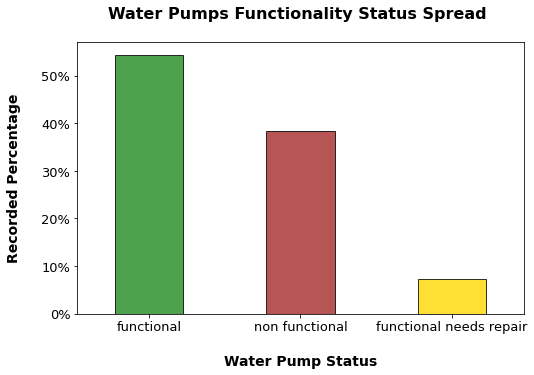

In [11]:
#Plot the status _group spread
ax = df.status_group.value_counts(normalize = True).plot(kind = 'bar', width = .45, figsize = (8, 5), 
                                                         color = ['forestgreen', 'brown', 'gold'],
                                                         edgecolor = 'black', alpha = .8)

#Format x- and y-axis
plt.xticks(fontsize = 13,  rotation = 0)
plt.xlabel('\nWater Pump Status', fontweight = 'bold', fontsize = 14 )
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.yticks(fontsize = 13)
plt.ylabel('Recorded Percentage\n', fontweight = 'bold', fontsize = 14)

#Format plot
plt.title('Water Pumps Functionality Status Spread \n', fontsize = 16, fontweight = 'bold');
plt.savefig("status_spread.png")

In [12]:
df.describe()

id     amount_tsh   gps_height     longitude      latitude  \
count  20000.00000   20000.000000  20000.00000  20000.000000  2.000000e+04   
mean   37007.70645     325.394430    666.81270     34.111313 -5.715622e+00   
std    21580.96974    3459.998068    693.17267      6.554726  2.948522e+00   
min        0.00000       0.000000    -63.00000      0.000000 -1.158630e+01   
25%    18314.75000       0.000000      0.00000     33.103252 -8.569859e+00   
50%    36892.50000       0.000000    364.00000     34.912733 -5.034241e+00   
75%    55895.50000      20.000000   1320.00000     37.210297 -3.325097e+00   
max    74246.00000  350000.000000   2770.00000     40.345193 -2.000000e-08   

        region_code  district_code    population  construction_year  
count  20000.000000   20000.000000  20000.000000        20000.00000  
mean      15.480050       5.662600    178.867500         1302.30460  
std       17.892049       9.645927    458.414578          951.09219  
min        1.000000       0.000000      0.000000            0.00000  
25%        5.000000       2.000000      0.000000            0.00000  
50%       12.000000       3.000000     25.000000         1985.00000  
75%       17.000000       5.000000    210.000000         2004.00000  
max       99.000000      80.000000  15300.000000         2013.00000

### Let's have a look at the amount of water in the well: amount_tsh

In [13]:
#looking at amount of water equal to zero.
df[df.amount_tsh == 0].status_group.value_counts(normalize=True)

functional                 0.473756
non functional             0.453947
functional needs repair    0.072297
Name: status_group, dtype: float64

In [14]:
len(df[df.amount_tsh == 0])

13984

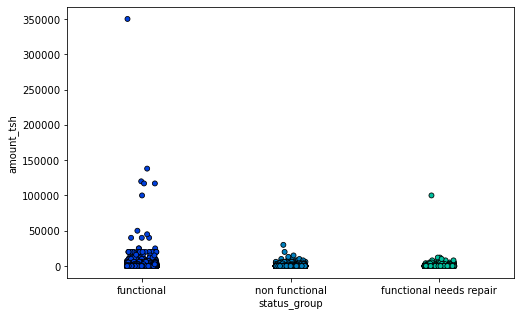

In [15]:
#Plot to see the amount of water left.
fig, ax = plt.subplots(figsize = (8, 5))
sns.stripplot(x = 'status_group', y = 'amount_tsh', data = df, edgecolor = 'black', linewidth = .8,  ax = ax,
             palette = "winter");
plt.savefig("status_group.png")

### Lets look at construction year:

In [16]:
len(df[df.construction_year == 0])/len(df)

0.3478

In [17]:
df[df.construction_year != 0].construction_year.describe()

count    13044.000000
mean      1996.787182
std         12.583458
min       1960.000000
25%       1987.000000
50%       2000.000000
75%       2008.000000
max       2013.000000
Name: construction_year, dtype: float64

/Users/Ravinder/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


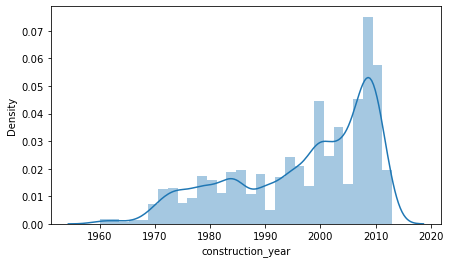

In [18]:
#Plot to see the construction yr of wells.
plt.figure(figsize=(7,4))
sns.distplot(df[df.construction_year != 0].construction_year);

### Let's have a look at quanity of water in the wells:

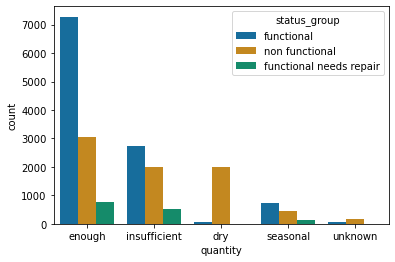

In [19]:
ax = sns.countplot(x='quantity', hue="status_group", data=df,palette = "colorblind")
plt.savefig('Quantity_left.png')

It can be observed that although there are enough water quantity in some wells, they are non-functional. When looking at this graph, dry quantity water points have a highly correlation with non-functionality. If the water point is dry or unknown, there is high chance thw water point is non functional. On the other hand, if the quantity is enough, there is a higher chance to find functional water points.

### let's look at the source of the wells:

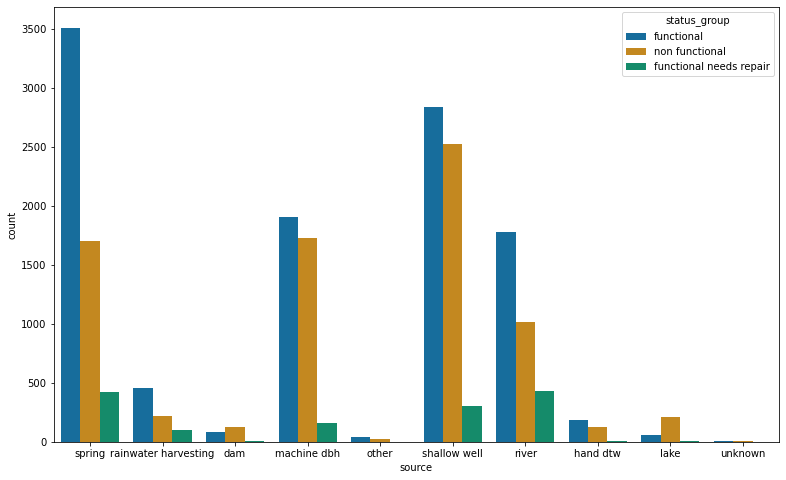

In [20]:
#Plotting to see source and their status
plt.figure(figsize=(13,8))
ax = sns.countplot(x='source', hue="status_group", data=df,palette = "colorblind")
plt.savefig('Source.png')

### Looking at funder of the wells:

In [21]:
#Counting the unque values.
df['funder'].value_counts().head(10)

Government Of Tanzania    2975
Danida                    1015
Hesawa                     742
Rwssp                      459
World Bank                 452
World Vision               438
Kkkt                       413
Unicef                     379
Tasaf                      310
0                          280
Name: funder, dtype: int64

This column is highly categorical column with thousands different values. So, we will take most common 10 values for future encoding.

In [22]:
df1 = df.loc[df['funder']== 'Government Of Tanzania']
df2 = df.loc[df['funder']== 'Danida']              
df3 = df.loc[df['funder']== 'Hesawa'] 
df4 = df.loc[df['funder']== 'Rwssp'] 
df5 = df.loc[df['funder']== 'World'] 
df6 = df.loc[df['funder']== 'Kkkt'] 
df7 = df.loc[df['funder']== 'World Vision'] 
df8 = df.loc[df['funder']== 'Unicef']
df9 = df.loc[df['funder']== 'Tasaf'] 
df10 = df.loc[df['funder']== '0'] 
df_funder = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10], ignore_index=True)

[Text(0, 0, 'Government Of Tanzania'),
 Text(1, 0, 'Danida'),
 Text(2, 0, 'Hesawa'),
 Text(3, 0, 'Rwssp'),
 Text(4, 0, 'Kkkt'),
 Text(5, 0, 'World Vision'),
 Text(6, 0, 'Unicef'),
 Text(7, 0, 'Tasaf'),
 Text(8, 0, '0')]

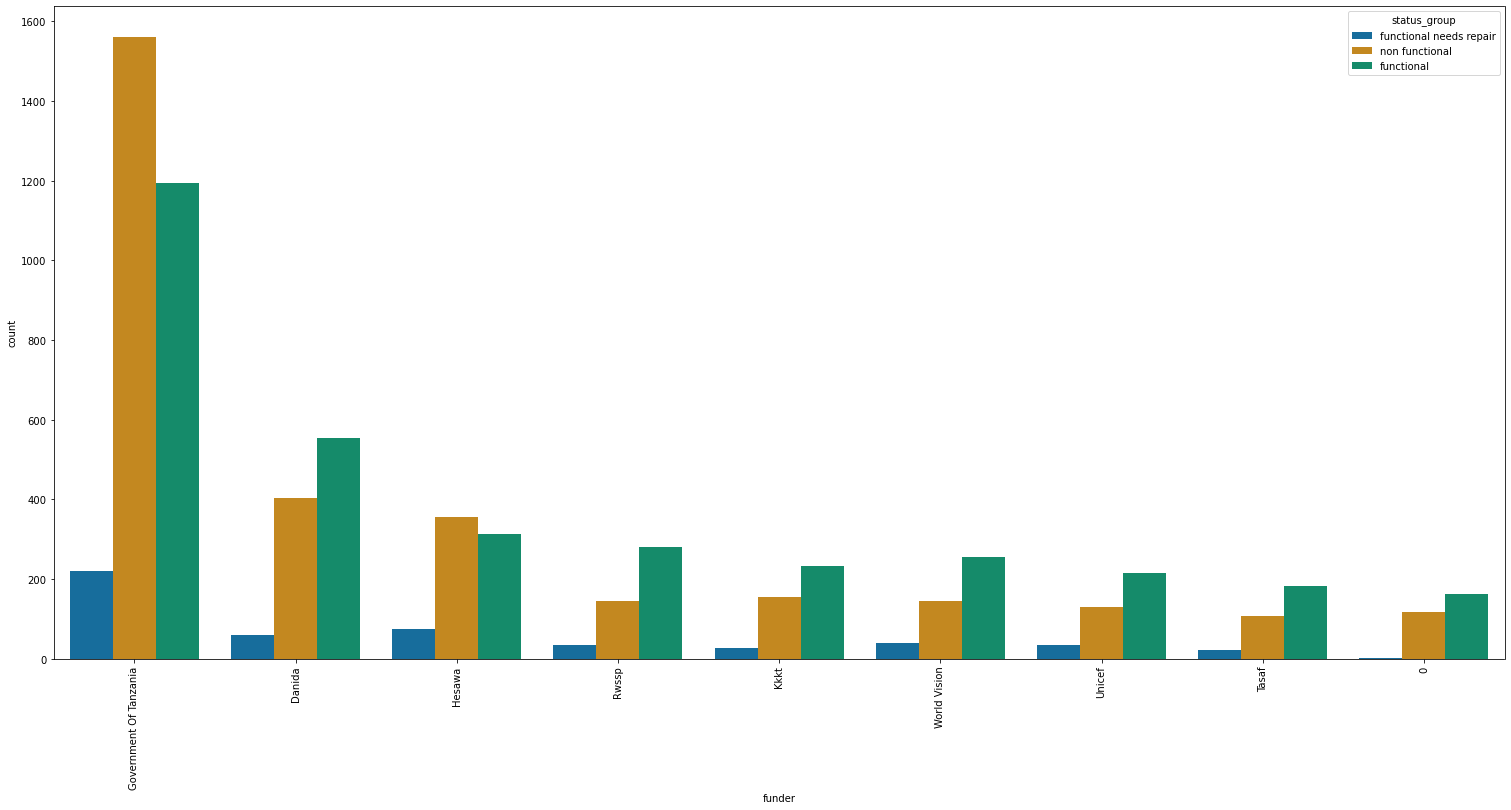

In [23]:
#Plotting the funder of the wells.
plt.figure(figsize=(26,12))
ax = sns.countplot(x='funder', hue="status_group", data=df_funder,palette = "colorblind")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

From the above plot, we realize that most of the water points which funded by government are non-functional.

### Let's have a look at water quality in the wells:

In [24]:
df['quality_group'].value_counts()

good        17040
salty        1775
unknown       650
milky         282
colored       176
fluoride       77
Name: quality_group, dtype: int64

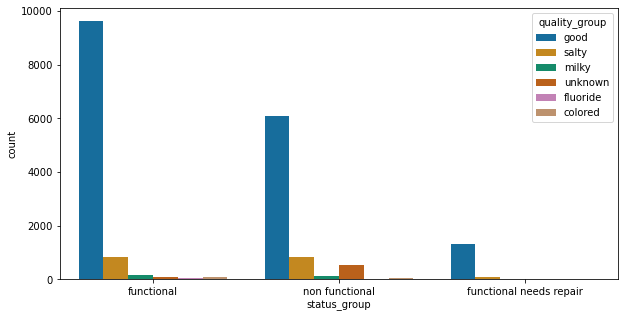

In [25]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='status_group', hue="quality_group", data=df,palette = "colorblind")
plt.savefig("Water_Quality.png")

### Lets's check which wells are well maintained which take payment.

In [26]:
df['payment'].value_counts()

never pay                8492
pay per bucket           3035
pay monthly              2809
unknown                  2768
pay when scheme fails    1342
pay annually             1213
other                     341
Name: payment, dtype: int64

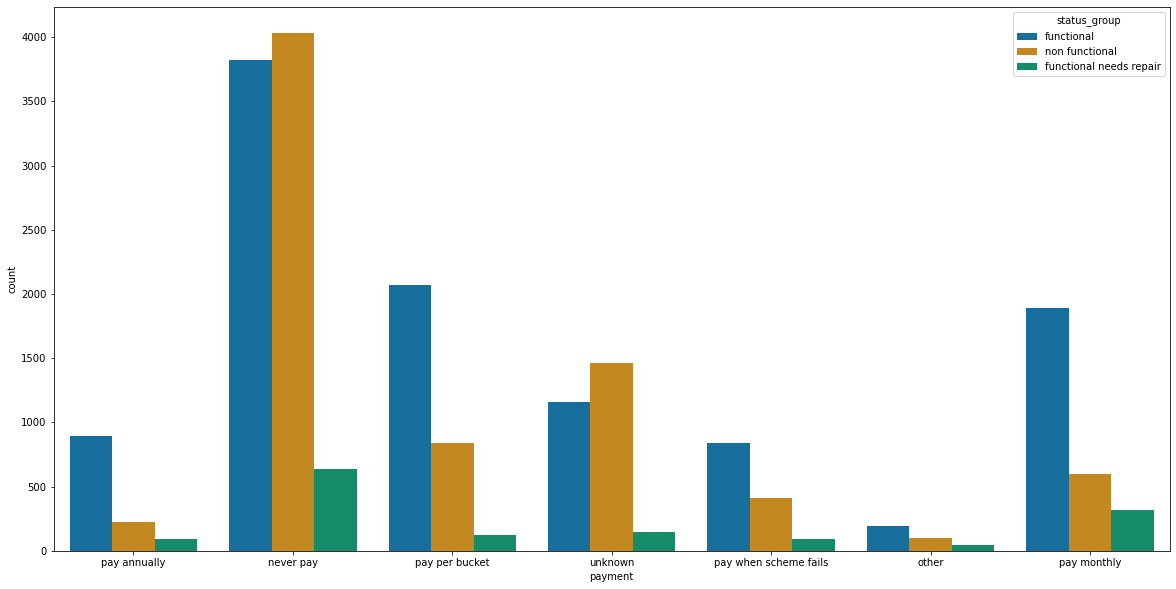

In [27]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='payment', hue="status_group", data=df,palette = "colorblind")
plt.savefig("Payemnt.png")

This feature shows us what the water cost. Mostly, there are lots of non-functional water points as nobody ever paid for them.

### Which waterpoint_type's are the most functional:

In [28]:
df['waterpoint_type'].value_counts()

communal standpipe             9559
hand pump                      5926
other                          2159
communal standpipe multiple    2069
improved spring                 246
cattle trough                    37
dam                               4
Name: waterpoint_type, dtype: int64

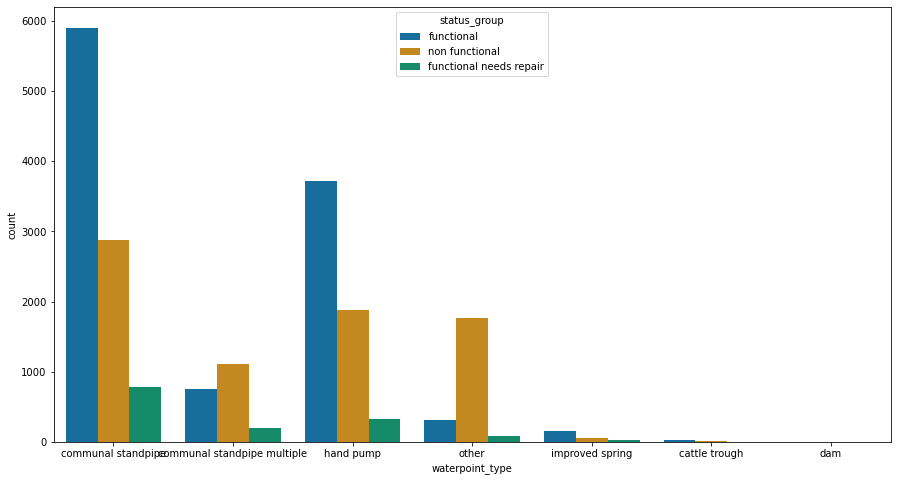

In [29]:
#plotting watertype with status_group
plt.figure(figsize=(15,8))
ax = sns.countplot(x='waterpoint_type', hue="status_group", data=df,palette = "colorblind")
plt.savefig("Waterpoint_type.png")

It can be seen that waterpoint type has correlation with funtionality of water points. Such that, communal standpipe has higher possibility to have functional, although communal standpipe multiple and others have higher possibility for non-functionality.

### Which management company is maintaining most functional wells.

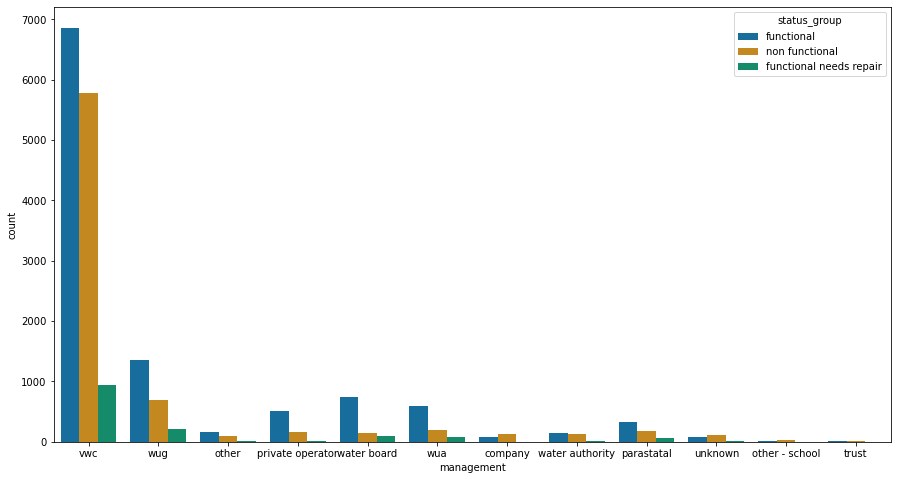

In [30]:
#plotting management.
plt.figure(figsize=(15,8))
ax = sns.countplot(x='management', hue="status_group", data=df,palette = "colorblind")
plt.savefig("management.png")

### Let's have a look at region column:

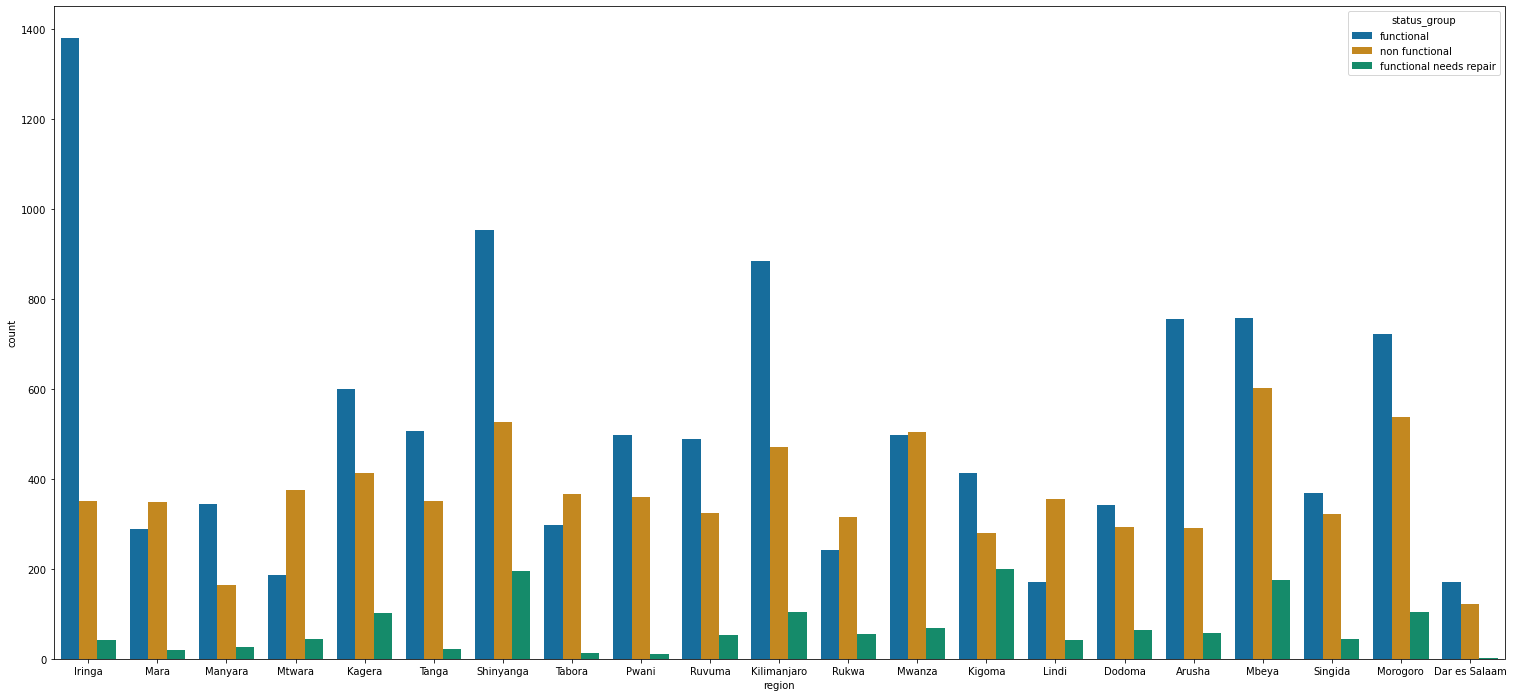

In [31]:
plt.figure(figsize=(26,12))
ax = sns.countplot(x='region', hue="status_group", data=df,palette = "colorblind")
plt.savefig("Region.png")

Some regions has higher probability of functional water well. Klimanjaro and Arusha have Pangani basin which has higher water point between basins. It is also seen that they have higher portions for functional wells.

In [32]:
#taking a look at iringa it has the most functional wells.
df_iringa =df.loc[df['region']=='Iringa'] #to see the Iringa area
df_iringa

id  amount_tsh date_recorded           funder  gps_height  \
0      69572      6000.0    2011-03-14            Roman        1390   
16     48451       500.0    2011-07-04           Unicef        1703   
17     58155         0.0    2011-09-04           Unicef        1656   
19     18274       500.0    2011-02-22           Danida        1763   
20     48375       200.0    2011-02-27              Twe        2216   
...      ...         ...           ...              ...         ...   
19931  56712      2000.0    2011-02-25  Anglican Church        1862   
19943  55720       500.0    2011-04-16   Roman Catholic        1853   
19954  64171      2500.0    2011-03-15            Shipo        1608   
19960  65913       100.0    2011-02-18            Unice        2277   
19983  24666      2400.0    2011-03-17           Danida        1631   

       longitude  latitude           wpt_name       basin  region  ...  \
0      34.938093 -9.856322               none  Lake Nyasa  Iringa  ...   
16     34.642439 -9.106185    Kwa John Mtenzi      Rufiji  Iringa  ...   
17     34.569266 -9.085515    Kwa Rose Chaula      Rufiji  Iringa  ...   
19     34.508967 -9.894412               none  Lake Nyasa  Iringa  ...   
20     34.473430 -9.594990               none  Lake Nyasa  Iringa  ...   
...          ...       ...                ...         ...     ...  ...   
19931  35.931047 -8.267362               none      Rufiji  Iringa  ...   
19943  34.747690 -9.174723  Kwa Saimon Kilasi      Rufiji  Iringa  ...   
19954  34.760365 -8.922258  Kwa Singila Mgoba      Rufiji  Iringa  ...   
19960  34.059099 -9.193125               none  Lake Nyasa  Iringa  ...   
19983  34.980971 -8.591899               none      Rufiji  Iringa  ...   

       construction_year  extraction_type_class management  \
0                   1999                gravity        vwc   
16                  1978                gravity        wua   
17                  1978                gravity        wua   
19                  1992                gravity        vwc   
20                  2008                gravity        vwc   
...                  ...                    ...        ...   
19931               2009                gravity        vwc   
19943               2009                gravity        wua   
19954               2010                gravity        vwc   
19960               2007                gravity        vwc   
19983                  0                gravity        vwc   

                     payment  quality_group quantity  source source_class  \
0               pay annually           good   enough  spring  groundwater   
16               pay monthly           good      dry   river      surface   
17     pay when scheme fails           good      dry   river      surface   
19              pay annually           good   enough  spring  groundwater   
20               pay monthly           good   enough  spring  groundwater   
...                      ...            ...      ...     ...          ...   
19931           pay annually           good   enough  spring  groundwater   
19943            pay monthly           good      dry  spring  groundwater   
19954           pay annually           good   enough  spring  groundwater   
19960              never pay           good   enough  spring  groundwater   
19983           pay annually           good   enough  spring  groundwater   

          waterpoint_type    status_group  
0      communal standpipe      functional  
16     communal standpipe  non functional  
17     communal standpipe  non functional  
19     communal standpipe      functional  
20     communal standpipe      functional  
...                   ...             ...  
19931  communal standpipe      functional  
19943  communal standpipe  non functional  
19954  communal standpipe      functional  
19960  communal standpipe      functional  
19983  communal standpipe      functional  

[1776 rows x 26 columns]

### Looking at population column:

In [33]:
df['population'].value_counts()

0       7172
1       2403
200      659
150      633
250      580
        ... 
1831       1
232        1
296        1
344        1
663        1
Name: population, Length: 719, dtype: int64

In [34]:
df.loc[df['population']==0].groupby('status_group').count()

id  amount_tsh  date_recorded  funder  gps_height  \
status_group                                                                   
functional               3802        3802           3802    3406        3802   
functional needs repair   590         590            590     473         590   
non functional           2780        2780           2780    2592        2780   

                         longitude  latitude  wpt_name  basin  region  ...  \
status_group                                                           ...   
functional                    3802      3802      3802   3802    3802  ...   
functional needs repair        590       590       590    590     590  ...   
non functional                2780      2780      2780   2780    2780  ...   

                         recorded_by  construction_year  \
status_group                                              
functional                      3802               3802   
functional needs repair          590                590   
non functional                  2780               2780   

                         extraction_type_class  management  payment  \
status_group                                                          
functional                                3802        3802     3802   
functional needs repair                    590         590      590   
non functional                            2780        2780     2780   

                         quality_group  quantity  source  source_class  \
status_group                                                             
functional                        3802      3802    3802          3802   
functional needs repair            590       590     590           590   
non functional                    2780      2780    2780          2780   

                         waterpoint_type  
status_group                              
functional                          3802  
functional needs repair              590  
non functional                      2780  

[3 rows x 25 columns]

Some functional water points has zero population, it is weird so we will change zero population to mean

In [35]:
# to see without zero mean and median
df.loc[df['population']!=0].describe() 

id     amount_tsh    gps_height     longitude      latitude  \
count  12828.000000   12828.000000  12828.000000  12828.000000  12828.000000   
mean   36979.809635     460.885999    965.511927     36.119379     -6.163819   
std    21521.490357    4287.380875    615.241504      2.571485      2.736845   
min        1.000000       0.000000    -63.000000     29.612507    -11.586297   
25%    18398.250000       0.000000    341.000000     34.728677     -8.478582   
50%    36899.000000       0.000000   1126.000000     36.753321     -5.860612   
75%    55638.250000     100.000000   1468.000000     38.007032     -3.623242   
max    74246.000000  350000.000000   2770.000000     40.345193     -1.094797   

        region_code  district_code   population  construction_year  
count  12828.000000   12828.000000  12828.00000       12828.000000  
mean      16.307686       6.369426    278.87044        1959.299501  
std       21.965966      11.324130    547.49640         271.411855  
min        2.000000       1.000000      1.00000           0.000000  
25%        4.000000       2.000000     40.00000        1985.000000  
50%       10.000000       3.000000    150.00000        2000.000000  
75%       16.000000       5.000000    320.00000        2008.000000  
max       99.000000      63.000000  15300.00000        2013.000000

In [36]:
#replacing 0's with mean:
df['population'].replace(to_replace = 0 , value =278, inplace=True)

In [37]:
df.sort_values(by='population', ascending=False).head(100).groupby('status_group').count()

id  amount_tsh  date_recorded  funder  gps_height  \
status_group                                                                 
functional               62          62             62      60          62   
functional needs repair   3           3              3       2           3   
non functional           35          35             35      34          35   

                         longitude  latitude  wpt_name  basin  region  ...  \
status_group                                                           ...   
functional                      62        62        62     62      62  ...   
functional needs repair          3         3         3      3       3  ...   
non functional                  35        35        35     35      35  ...   

                         recorded_by  construction_year  \
status_group                                              
functional                        62                 62   
functional needs repair            3                  3   
non functional                    35                 35   

                         extraction_type_class  management  payment  \
status_group                                                          
functional                                  62          62       62   
functional needs repair                      3           3        3   
non functional                              35          35       35   

                         quality_group  quantity  source  source_class  \
status_group                                                             
functional                          62        62      62            62   
functional needs repair              3         3       3             3   
non functional                      35        35      35            35   

                         waterpoint_type  
status_group                              
functional                            62  
functional needs repair                3  
non functional                        35  

[3 rows x 25 columns]

In [38]:
df['population'].mean()

278.5583

To see the most populated areas water point functionality , we did groupby. It shows that higher population areas have more functional water points

In [39]:
#creating a scatter plot to see where population around the well lies.
import plotly.express as px
fig = px.scatter_mapbox(df[df['population'] < 278],
                       lat='latitude',
                       lon='longitude',
                       color='population',
                       zoom=7)
fig.update_layout(mapbox_style='open-street-map')
plt.savefig('Population_around_well.pdf')
fig.show()

<Figure size 432x288 with 0 Axes>

In [40]:
#checking quality of water:
df_iringa.groupby(['quality_group','status_group']).count()

id  amount_tsh  date_recorded  \
quality_group status_group                                               
good          functional               1376        1376           1376   
              functional needs repair    42          42             42   
              non functional            333         333            333   
salty         functional                  5           5              5   
              non functional              4           4              4   
unknown       functional                  1           1              1   
              non functional             15          15             15   

                                       funder  gps_height  longitude  \
quality_group status_group                                             
good          functional                 1374        1376       1376   
              functional needs repair      42          42         42   
              non functional              333         333        333   
salty         functional                    5           5          5   
              non functional                4           4          4   
unknown       functional                    1           1          1   
              non functional               15          15         15   

                                       latitude  wpt_name  basin  region  ...  \
quality_group status_group                                                ...   
good          functional                   1376      1376   1376    1376  ...   
              functional needs repair        42        42     42      42  ...   
              non functional                333       333    333     333  ...   
salty         functional                      5         5      5       5  ...   
              non functional                  4         4      4       4  ...   
unknown       functional                      1         1      1       1  ...   
              non functional                 15        15     15      15  ...   

                                       population  recorded_by  \
quality_group status_group                                       
good          functional                     1376         1376   
              functional needs repair          42           42   
              non functional                  333          333   
salty         functional                        5            5   
              non functional                    4            4   
unknown       functional                        1            1   
              non functional                   15           15   

                                       construction_year  \
quality_group status_group                                 
good          functional                            1376   
              functional needs repair                 42   
              non functional                         333   
salty         functional                               5   
              non functional                           4   
unknown       functional                               1   
              non functional                          15   

                                       extraction_type_class  management  \
quality_group status_group                                                 
good          functional                                1376        1376   
              functional needs repair                     42          42   
              non functional                             333         333   
salty         functional                                   5           5   
              non functional                               4           4   
unknown       functional                                   1           1   
              non functional                              15          15   

                                       payment  quantity  source  \
quality_group status_group                                         
good          functional              

When we looked at the Iringa area which has higher water points. There are also 333 wells which has soft, good water but non-functional.

### basin column:

In [41]:
df['basin'].value_counts()

Lake Victoria              3449
Pangani                    3030
Rufiji                     2655
Internal                   2626
Lake Tanganyika            2152
Wami / Ruvu                2019
Lake Nyasa                 1657
Ruvuma / Southern Coast    1595
Lake Rukwa                  817
Name: basin, dtype: int64

### Plotting gps_height with status_group:

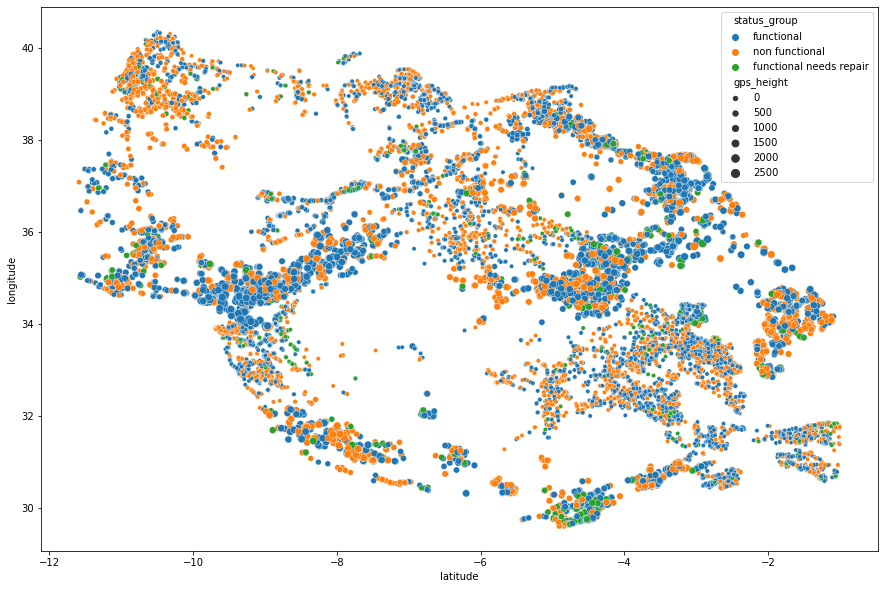

In [42]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=df[df.longitude >= 25], x='latitude', y='longitude', 
                size='gps_height', hue='status_group', ax=ax);
plt.savefig('HeightofWell')

We can see that waterpoints are more densely distributed in some regions that in others.

There seems to be a high amount of non functional wells in the Southeast and Northwest regions of Tanzania.
Also, there are some large open spaces without any waterpoints being recorded.
In addition, visually we can also see that more of the "larger" waterpoints (meaning they're higher in altitude gps_height) have been recorded as functional.

### Let's have a look at categorical features:

#### Checking all the unique and missing values of each column:
###### We will create a function and check for the unique and missing values.


In [136]:
#Cretaing the function.
def checking_unique_missing(list):
  '''
  check the Feature Name, Number of Unique Values, Number of Missing Values, Unique Values

  '''
  for i in list:
      print("Feature Name:", i)
      print("Number of Unique Values:", len(df[i].unique()))
      print("Unique Values:", df[i].unique())
      print("Missing Values:", df[i].isna().sum())
      print('\n')

In [44]:
checking_unique_missing(['extraction_type_class','payment','quality_group','quantity','source','source_class','waterpoint_type','management','region','basin','region_code','district_code'])

Feature Name: extraction_type_class
Number of Unique Values: 7
Unique Values: ['gravity' 'submersible' 'handpump' 'other' 'motorpump' 'wind-powered'
 'rope pump']
Missing Values: 0


Feature Name: payment
Number of Unique Values: 7
Unique Values: ['pay annually' 'never pay' 'pay per bucket' 'unknown'
 'pay when scheme fails' 'other' 'pay monthly']
Missing Values: 0


Feature Name: quality_group
Number of Unique Values: 6
Unique Values: ['good' 'salty' 'milky' 'unknown' 'fluoride' 'colored']
Missing Values: 0


Feature Name: quantity
Number of Unique Values: 5
Unique Values: ['enough' 'insufficient' 'dry' 'seasonal' 'unknown']
Missing Values: 0


Feature Name: source
Number of Unique Values: 10
Unique Values: ['spring' 'rainwater harvesting' 'dam' 'machine dbh' 'other'
 'shallow well' 'river' 'hand dtw' 'lake' 'unknown']
Missing Values: 0


Feature Name: source_class
Number of Unique Values: 3
Unique Values: ['groundwater' 'surface' 'unknown']
Missing Values: 0


Feature Name: waterpoin

In [45]:
df.describe()

id     amount_tsh   gps_height     longitude      latitude  \
count  20000.00000   20000.000000  20000.00000  20000.000000  2.000000e+04   
mean   37007.70645     325.394430    666.81270     34.111313 -5.715622e+00   
std    21580.96974    3459.998068    693.17267      6.554726  2.948522e+00   
min        0.00000       0.000000    -63.00000      0.000000 -1.158630e+01   
25%    18314.75000       0.000000      0.00000     33.103252 -8.569859e+00   
50%    36892.50000       0.000000    364.00000     34.912733 -5.034241e+00   
75%    55895.50000      20.000000   1320.00000     37.210297 -3.325097e+00   
max    74246.00000  350000.000000   2770.00000     40.345193 -2.000000e-08   

        region_code  district_code    population  construction_year  
count  20000.000000   20000.000000  20000.000000        20000.00000  
mean      15.480050       5.662600    278.558300         1302.30460  
std       17.892049       9.645927    438.469987          951.09219  
min        1.000000       0.000000      1.000000            0.00000  
25%        5.000000       2.000000     98.000000            0.00000  
50%       12.000000       3.000000    278.000000         1985.00000  
75%       17.000000       5.000000    278.000000         2004.00000  
max       99.000000      80.000000  15300.000000         2013.00000

## Let's have a look at the continous features:

### For the date_recorded column,I will split it into year,date and month.
#### The idea is to calculate the age of the well by:  date_recorded - construction year

In [46]:
#Tidy up the date-yr-month into separate columns
df[["year", "month", "day"]] = df["date_recorded"].str.split("-", expand = True).astype(int)
df

id  amount_tsh date_recorded                  funder  gps_height  \
0      69572      6000.0    2011-03-14                   Roman        1390   
1       8776         0.0    2013-03-06                 Grumeti        1399   
2      34310        25.0    2013-02-25            Lottery Club         686   
3      67743         0.0    2013-01-28                  Unicef         263   
4      19728         0.0    2011-07-13             Action In A           0   
...      ...         ...           ...                     ...         ...   
19995  49338       100.0    2013-01-23                 Concern         196   
19996  36601         0.0    2013-01-21              Fini Water         260   
19997  13299         0.0    2013-02-24             Netherlands           0   
19998  57089         0.0    2012-10-17  Government Of Tanzania           0   
19999  61035         0.0    2013-03-03                  Danida         872   

       longitude   latitude                    wpt_name  \
0      34.938093  -9.856322                        none   
1      34.698766  -2.147466                    Zahanati   
2      37.460664  -3.821329                 Kwa Mahundi   
3      38.486161 -11.155298        Zahanati Ya Nanyumbu   
4      31.130847  -1.825359                     Shuleni   
...          ...        ...                         ...   
19995  39.495034 -10.278200  Kilimanjaro Primary School   
19996  38.954102  -9.976577                      Liumbe   
19997  33.591385  -3.149213                 Mtu Ni Afya   
19998  33.103730  -3.915889          Kwa Tungu Machibye   
19999  36.047885 -10.617697           Kwa Aidi Mohamedi   

                         basin     region  ...                payment  \
0                   Lake Nyasa     Iringa  ...           pay annually   
1                Lake Victoria       Mara  ...              never pay   
2                      Pangani    Manyara  ...         pay per bucket   
3      Ruvuma / Southern Coast     Mtwara  ...              never pay   
4                Lake Victoria     Kagera  ...              never pay   
...                        ...        ...  ...                    ...   
19995  Ruvuma / Southern Coast      Lindi  ...         pay per bucket   
19996  Ruvuma / Southern Coast      Lindi  ...              never pay   
19997            Lake Victoria  Shinyanga  ...              never pay   
19998                 Internal  Shinyanga  ...              never pay   
19999  Ruvuma / Southern Coast     Ruvuma  ...  pay when scheme fails   

       quality_group      quantity                source  source_class  \
0               good        enough                spring   groundwater   
1               good  insufficient  rainwater harvesting       surface   
2               good        enough                   dam       surface   
3               good           dry           machine dbh   groundwater   
4               good      seasonal  rainwater harvesting       surface   
...              ...           ...                   ...           ...   
19995           good      seasonal  rainwater harvesting       surface   
19996           good        enough          shallow well   groundwater   
19997           good      seasonal          shallow well   groundwater   
19998           good  insufficient          shallow well   groundwater   
19999           good  insufficient          shallow well   groundwater   

                   waterpoint_type    status_group  year month day  
0               communal standpipe      functional  2011     3  14  
1               communal standpipe      functional  2013     3   6  
2      communal standpipe multiple      functional  2013     2  25  
3      communal standpipe multiple  non functional  2013     1  28  
4               communal standpipe      functional  2011     7  13  
...                            ...             ...   ...   ...  ..  
19995  communal standpipe multiple  non functional  2013     1  23  
19996                        other  non functi

In [47]:
df['construction_year'].value_counts()

0       6956
2010     917
2008     893
2009     838
2000     706
2007     538
2006     504
2003     449
2011     410
2012     390
2002     366
2004     362
1978     349
2005     335
1995     318
1999     318
1998     317
1990     317
1985     296
1980     285
1984     264
1996     259
1982     257
1972     243
1994     241
1974     238
1997     227
2001     199
1992     197
1993     191
1983     173
1975     171
1988     157
1986     152
1970     146
1976     141
1991     115
1989     104
1987      97
1981      81
1977      74
1973      61
2013      59
1979      53
1971      48
1960      38
1968      35
1967      31
1963      26
1969      21
1964      15
1962      13
1961       4
1965       3
1966       2
Name: construction_year, dtype: int64

In [48]:
df.describe()

id     amount_tsh   gps_height     longitude      latitude  \
count  20000.00000   20000.000000  20000.00000  20000.000000  2.000000e+04   
mean   37007.70645     325.394430    666.81270     34.111313 -5.715622e+00   
std    21580.96974    3459.998068    693.17267      6.554726  2.948522e+00   
min        0.00000       0.000000    -63.00000      0.000000 -1.158630e+01   
25%    18314.75000       0.000000      0.00000     33.103252 -8.569859e+00   
50%    36892.50000       0.000000    364.00000     34.912733 -5.034241e+00   
75%    55895.50000      20.000000   1320.00000     37.210297 -3.325097e+00   
max    74246.00000  350000.000000   2770.00000     40.345193 -2.000000e-08   

        region_code  district_code    population  construction_year  \
count  20000.000000   20000.000000  20000.000000        20000.00000   
mean      15.480050       5.662600    278.558300         1302.30460   
std       17.892049       9.645927    438.469987          951.09219   
min        1.000000       0.000000      1.000000            0.00000   
25%        5.000000       2.000000     98.000000            0.00000   
50%       12.000000       3.000000    278.000000         1985.00000   
75%       17.000000       5.000000    278.000000         2004.00000   
max       99.000000      80.000000  15300.000000         2013.00000   

               year         month           day  
count  20000.000000  20000.000000  20000.000000  
mean    2011.923050      4.380350     15.637400  
std        0.961964      3.038872      8.676329  
min     2002.000000      1.000000      1.000000  
25%     2011.000000      2.000000      8.000000  
50%     2012.000000      3.000000     16.000000  
75%     2013.000000      7.000000     23.000000  
max     2013.000000     12.000000     31.000000

Since, construction_year has lot of 0 values,to find the approx age of the wells,I am filling the 0 values with the median of the value: 1986, we will assume these wells are constructed after 1986.

In [49]:
df['construction_year']=df['construction_year'].replace(0,1986)
df

id  amount_tsh date_recorded                  funder  gps_height  \
0      69572      6000.0    2011-03-14                   Roman        1390   
1       8776         0.0    2013-03-06                 Grumeti        1399   
2      34310        25.0    2013-02-25            Lottery Club         686   
3      67743         0.0    2013-01-28                  Unicef         263   
4      19728         0.0    2011-07-13             Action In A           0   
...      ...         ...           ...                     ...         ...   
19995  49338       100.0    2013-01-23                 Concern         196   
19996  36601         0.0    2013-01-21              Fini Water         260   
19997  13299         0.0    2013-02-24             Netherlands           0   
19998  57089         0.0    2012-10-17  Government Of Tanzania           0   
19999  61035         0.0    2013-03-03                  Danida         872   

       longitude   latitude                    wpt_name  \
0      34.938093  -9.856322                        none   
1      34.698766  -2.147466                    Zahanati   
2      37.460664  -3.821329                 Kwa Mahundi   
3      38.486161 -11.155298        Zahanati Ya Nanyumbu   
4      31.130847  -1.825359                     Shuleni   
...          ...        ...                         ...   
19995  39.495034 -10.278200  Kilimanjaro Primary School   
19996  38.954102  -9.976577                      Liumbe   
19997  33.591385  -3.149213                 Mtu Ni Afya   
19998  33.103730  -3.915889          Kwa Tungu Machibye   
19999  36.047885 -10.617697           Kwa Aidi Mohamedi   

                         basin     region  ...                payment  \
0                   Lake Nyasa     Iringa  ...           pay annually   
1                Lake Victoria       Mara  ...              never pay   
2                      Pangani    Manyara  ...         pay per bucket   
3      Ruvuma / Southern Coast     Mtwara  ...              never pay   
4                Lake Victoria     Kagera  ...              never pay   
...                        ...        ...  ...                    ...   
19995  Ruvuma / Southern Coast      Lindi  ...         pay per bucket   
19996  Ruvuma / Southern Coast      Lindi  ...              never pay   
19997            Lake Victoria  Shinyanga  ...              never pay   
19998                 Internal  Shinyanga  ...              never pay   
19999  Ruvuma / Southern Coast     Ruvuma  ...  pay when scheme fails   

       quality_group      quantity                source  source_class  \
0               good        enough                spring   groundwater   
1               good  insufficient  rainwater harvesting       surface   
2               good        enough                   dam       surface   
3               good           dry           machine dbh   groundwater   
4               good      seasonal  rainwater harvesting       surface   
...              ...           ...                   ...           ...   
19995           good      seasonal  rainwater harvesting       surface   
19996           good        enough          shallow well   groundwater   
19997           good      seasonal          shallow well   groundwater   
19998           good  insufficient          shallow well   groundwater   
19999           good  insufficient          shallow well   groundwater   

                   waterpoint_type    status_group  year month day  
0               communal standpipe      functional  2011     3  14  
1               communal standpipe      functional  2013     3   6  
2      communal standpipe multiple      functional  2013     2  25  
3      communal standpipe multiple  non functional  2013     1  28  
4               communal standpipe      functional  2011     7  13  
...                            ...             ...   ...   ...  ..  
19995  communal standpipe multiple  non functional  2013     1  23  
19996                        other  non functi

In [50]:
#Finding the age of well:
df["Age_of_Well"] = df.apply(lambda x: x['year'] - x['construction_year'], axis=1)
df

id  amount_tsh date_recorded                  funder  gps_height  \
0      69572      6000.0    2011-03-14                   Roman        1390   
1       8776         0.0    2013-03-06                 Grumeti        1399   
2      34310        25.0    2013-02-25            Lottery Club         686   
3      67743         0.0    2013-01-28                  Unicef         263   
4      19728         0.0    2011-07-13             Action In A           0   
...      ...         ...           ...                     ...         ...   
19995  49338       100.0    2013-01-23                 Concern         196   
19996  36601         0.0    2013-01-21              Fini Water         260   
19997  13299         0.0    2013-02-24             Netherlands           0   
19998  57089         0.0    2012-10-17  Government Of Tanzania           0   
19999  61035         0.0    2013-03-03                  Danida         872   

       longitude   latitude                    wpt_name  \
0      34.938093  -9.856322                        none   
1      34.698766  -2.147466                    Zahanati   
2      37.460664  -3.821329                 Kwa Mahundi   
3      38.486161 -11.155298        Zahanati Ya Nanyumbu   
4      31.130847  -1.825359                     Shuleni   
...          ...        ...                         ...   
19995  39.495034 -10.278200  Kilimanjaro Primary School   
19996  38.954102  -9.976577                      Liumbe   
19997  33.591385  -3.149213                 Mtu Ni Afya   
19998  33.103730  -3.915889          Kwa Tungu Machibye   
19999  36.047885 -10.617697           Kwa Aidi Mohamedi   

                         basin     region  ...  quality_group      quantity  \
0                   Lake Nyasa     Iringa  ...           good        enough   
1                Lake Victoria       Mara  ...           good  insufficient   
2                      Pangani    Manyara  ...           good        enough   
3      Ruvuma / Southern Coast     Mtwara  ...           good           dry   
4                Lake Victoria     Kagera  ...           good      seasonal   
...                        ...        ...  ...            ...           ...   
19995  Ruvuma / Southern Coast      Lindi  ...           good      seasonal   
19996  Ruvuma / Southern Coast      Lindi  ...           good        enough   
19997            Lake Victoria  Shinyanga  ...           good      seasonal   
19998                 Internal  Shinyanga  ...           good  insufficient   
19999  Ruvuma / Southern Coast     Ruvuma  ...           good  insufficient   

                     source source_class              waterpoint_type  \
0                    spring  groundwater           communal standpipe   
1      rainwater harvesting      surface           communal standpipe   
2                       dam      surface  communal standpipe multiple   
3               machine dbh  groundwater  communal standpipe multiple   
4      rainwater harvesting      surface           communal standpipe   
...                     ...          ...                          ...   
19995  rainwater harvesting      surface  communal standpipe multiple   
19996          shallow well  groundwater                        other   
19997          shallow well  groundwater                    hand pump   
19998          shallow well  groundwater                    hand pump   
19999          shallow well  groundwater                    hand pump   

         status_group  year month day Age_of_Well  
0          functional  2011     3  14          12  
1          functional  2013     3   6           3  
2          functional  2013     2  25           4  
3      non functional  2013     1  28          27  
4          functional  2011     7  13          25  
...               ...   ...   ...  ..         ...  
19995  non functional  2013     1  23          10  
19996  non functional  2013     1  21          33  
19997      functional  2013     2  24          27  
19998  non functio

In [51]:
#Viewing contruction_yr of wells and binning them:
view_age =[df.construction_year > 2005, 
       df.construction_year > 2000, 
       df.construction_year > 1990, 
       df.construction_year > 1980, 
       df.construction_year > 1970]
vals = ['after05', '00s', '90s', '80s', '70s']

df['year_built'] = np.select(view_age, vals, 'others')

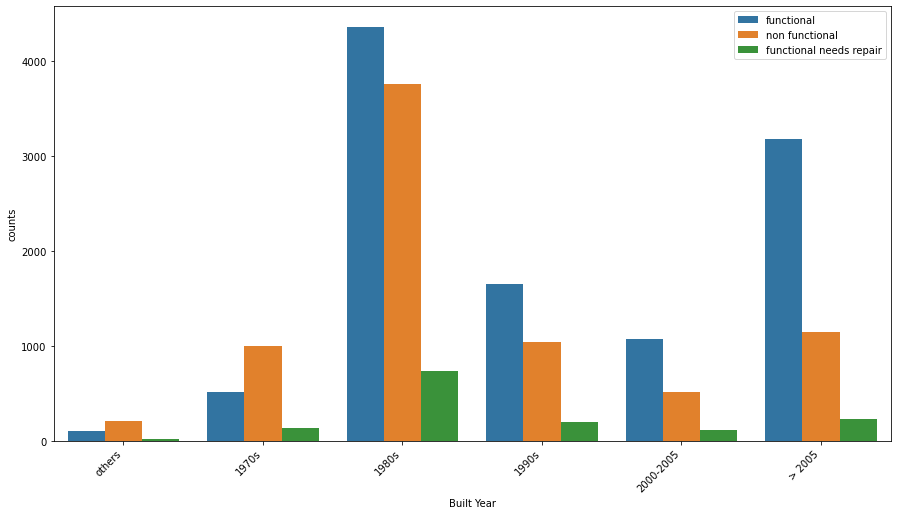

In [52]:
#Plot to view the condition of wells according to their construction_year:
fig = plt.figure(figsize = (15,8))

sns.countplot(x = 'year_built', hue = 'status_group', data = df, 
              order = ['others', '70s', '80s', '90s', '00s', 'after05'])

plt.xticks(rotation = 45, ha = 'right', ticks = range(0, 6), 
           labels = ['others', '1970s', '1980s', '1990s', '2000-2005', '> 2005'])
plt.xlabel('Built Year')
plt.ylabel('counts')
plt.legend(bbox_to_anchor = [1, 1])
fig.patch.set_visible(False)
plt.savefig("Built_year")

plt.show()

It seems condtion of wells built before 1980's is deteriorating and are mostly non-functional.

In [53]:
for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(), '\n\n' )

id 
 73284    0.00005
53999    0.00005
8929     0.00005
51079    0.00005
35556    0.00005
Name: id, dtype: float64 


amount_tsh 
 0.0       0.69920
500.0     0.05405
50.0      0.04320
20.0      0.02585
1000.0    0.02500
Name: amount_tsh, dtype: float64 


date_recorded 
 2013-02-03    0.00930
2011-03-15    0.00925
2011-03-17    0.00920
2011-03-16    0.00895
2011-03-14    0.00860
Name: date_recorded, dtype: float64 


funder 
 Government Of Tanzania    0.158430
Danida                    0.054053
Hesawa                    0.039514
Rwssp                     0.024443
World Bank                0.024071
Name: funder, dtype: float64 


gps_height 
  0       0.34215
-14      0.00125
-20      0.00105
 1295    0.00105
 1304    0.00105
Name: gps_height, dtype: float64 


longitude 
 0.000000     0.0303
39.091434    0.0001
33.015597    0.0001
39.085965    0.0001
37.541579    0.0001
Name: longitude, dtype: float64 


latitude 
 -2.000000e-08    0.0303
-2.501627e+00    0.0001
-6.962475e+00    0.000

Filler values found:

* population - 0 ,1
* construction_year - 0
* payment - unknown
* quality_group - unknown
* quantity - unknown
* extraction_type_class-other
* source_class -unknown
* waterpoint_type - other


## Prepping the data:
I will separate continous features and categorical features in order to perform dummy encoding.

In [54]:
#choosing columns for our dataset.
df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'longitude', 'latitude', 'wpt_name', 'basin', 'region', 'region_code',
       'district_code', 'lga', 'ward', 'population', 'recorded_by',
       'construction_year', 'extraction_type_class', 'management', 'payment',
       'quality_group', 'quantity', 'source', 'source_class',
       'waterpoint_type', 'status_group', 'year', 'month', 'day',
       'Age_of_Well', 'year_built'],
      dtype='object')

Dropping the columns that have too many unique values,like region code,district code.

In [55]:
#Dropping the columns that don't need.
df_new = df.drop(['status_group','id','date_recorded','longitude','latitude','month','day','region_code','district_code','lga','wpt_name','ward'], axis = 1)
df_new

amount_tsh                  funder  gps_height  \
0          6000.0                   Roman        1390   
1             0.0                 Grumeti        1399   
2            25.0            Lottery Club         686   
3             0.0                  Unicef         263   
4             0.0             Action In A           0   
...           ...                     ...         ...   
19995       100.0                 Concern         196   
19996         0.0              Fini Water         260   
19997         0.0             Netherlands           0   
19998         0.0  Government Of Tanzania           0   
19999         0.0                  Danida         872   

                         basin     region  population  \
0                   Lake Nyasa     Iringa         109   
1                Lake Victoria       Mara         280   
2                      Pangani    Manyara         250   
3      Ruvuma / Southern Coast     Mtwara          58   
4                Lake Victoria     Kagera         278   
...                        ...        ...         ...   
19995  Ruvuma / Southern Coast      Lindi        1885   
19996  Ruvuma / Southern Coast      Lindi         650   
19997            Lake Victoria  Shinyanga         278   
19998                 Internal  Shinyanga         278   
19999  Ruvuma / Southern Coast     Ruvuma         180   

                   recorded_by  construction_year extraction_type_class  \
0      GeoData Consultants Ltd               1999               gravity   
1      GeoData Consultants Ltd               2010               gravity   
2      GeoData Consultants Ltd               2009               gravity   
3      GeoData Consultants Ltd               1986           submersible   
4      GeoData Consultants Ltd               1986               gravity   
...                        ...                ...                   ...   
19995  GeoData Consultants Ltd               2003               gravity   
19996  GeoData Consultants Ltd               1980                 other   
19997  GeoData Consultants Ltd               1986              handpump   
19998  GeoData Consultants Ltd               1986                 other   
19999  GeoData Consultants Ltd               1994              handpump   

      management                payment quality_group      quantity  \
0            vwc           pay annually          good        enough   
1            wug              never pay          good  insufficient   
2            vwc         pay per bucket          good        enough   
3            vwc              never pay          good           dry   
4          other              never pay          good      seasonal   
...          ...                    ...           ...           ...   
19995        vwc         pay per bucket          good      seasonal   
19996        vwc              never pay          good        enough   
19997        wug              never pay          good      seasonal   
19998        vwc              never pay          good  insufficient   
19999        wug  pay when scheme fails          good  insufficient   

                     source source_class              waterpoint_type  year  \
0                    spring  groundwater           communal standpipe  2011   
1      rainwater harvesting      surface           communal standpipe  2013   
2                       dam      surface  communal standpipe multiple  2013   
3               machine dbh  groundwater  communal standpipe multiple  2013   
4      rainwater harvesting      surface           communal standpipe  2011   
...                     ...          ...                          ...   ...   
19995  rainwater harvesting      surface  communal standpipe multiple  2013   
19996          shallow well  groundwater                        other  2013   
19997          shallow well  groundwater                    hand pump  2013   
19998          shallow well  groundwater                    hand pump  2012   
19999         

In [56]:
#Define target
target = df['status_group']

In [57]:
df_new.columns

Index(['amount_tsh', 'funder', 'gps_height', 'basin', 'region', 'population',
       'recorded_by', 'construction_year', 'extraction_type_class',
       'management', 'payment', 'quality_group', 'quantity', 'source',
       'source_class', 'waterpoint_type', 'year', 'Age_of_Well', 'year_built'],
      dtype='object')

In [58]:
#Defining categorical and cntinuous features
continous_feats = ['amount_tsh', 'gps_height', 
            'population', 'construction_year']
categorical_feats = list(df_new.drop(continous_feats, axis = 1).columns)

In [59]:
categorical_feats

['funder',
 'basin',
 'region',
 'recorded_by',
 'extraction_type_class',
 'management',
 'payment',
 'quality_group',
 'quantity',
 'source',
 'source_class',
 'waterpoint_type',
 'year',
 'Age_of_Well',
 'year_built']

In [60]:
#Creating dummy variables:
dummy = pd.get_dummies(df[categorical_feats],drop_first =True)
dummy.shape

(20000, 1224)

In [61]:
#Finalise df_new for modeling
df_new.drop(categorical_feats, axis = 1, inplace = True)
#df_new.drop(to_remove, axis = 1, inplace = True)

df_new = pd.concat ([df_new, dummy], axis = 1)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 1228 entries, amount_tsh to year_built_others
dtypes: float64(1), int64(5), uint8(1222)
memory usage: 24.2 MB


In [62]:
#Let's view this new dataframe
df_new.head(5)

amount_tsh  gps_height  population  construction_year  year  Age_of_Well  \
0      6000.0        1390         109               1999  2011           12   
1         0.0        1399         280               2010  2013            3   
2        25.0         686         250               2009  2013            4   
3         0.0         263          58               1986  2013           27   
4         0.0           0         278               1986  2011           25   

   funder_A/co Germany  funder_Aar  funder_Abasia  funder_Abd  ...  \
0                    0           0              0           0  ...   
1                    0           0              0           0  ...   
2                    0           0              0           0  ...   
3                    0           0              0           0  ...   
4                    0           0              0           0  ...   

   waterpoint_type_communal standpipe multiple  waterpoint_type_dam  \
0                                            0                    0   
1                                            0                    0   
2                                            1                    0   
3                                            1                    0   
4                                            0                    0   

   waterpoint_type_hand pump  waterpoint_type_improved spring  \
0                          0                                0   
1                          0                                0   
2                          0                                0   
3                          0                                0   
4                          0                                0   

   waterpoint_type_other  year_built_70s  year_built_80s  year_built_90s  \
0                      0               0               0               1   
1                      0               0               0               0   
2                      0               0               0               0   
3                      0               0               1               0   
4                      0               0               1               0   

   year_built_after05  year_built_others  
0                   0                  0  
1                   1                  0  
2                   1                  0  
3                   0                  0  
4                   0                  0  

[5 rows x 1228 columns]

### Modelling the data:

In [63]:
#Splitting the data into test,train:
X_train, X_test, y_train, y_test = train_test_split(df_new, target,test_size=0.25, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15000, 1228), (5000, 1228), (15000,), (5000,))

In [64]:
#Instantial StandardScaler
scaler = StandardScaler()

#Transform the train and test sets
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#Convert to DataFrae
X_train = pd.DataFrame(X_train, columns = df_new.columns)
X_train.head()

amount_tsh  gps_height  population  construction_year      year  \
0   -0.034967    0.843902   -0.626755           0.869737  1.119035   
1   -0.085982    1.013189    0.047396           1.483314  1.119035   
2   -0.085982    1.237458   -0.563624           1.220353  1.119035   
3    0.296630   -0.315063   -0.626755           0.606775  1.119035   
4   -0.034967   -0.326638   -0.178073          -0.708033 -0.953508   

   Age_of_Well  funder_A/co Germany  funder_Aar  funder_Abasia  funder_Abd  \
0    -0.784054            -0.020004   -0.021608        -0.0231   -0.011548   
1    -1.404733            -0.020004   -0.021608        -0.0231   -0.011548   
2    -1.138728            -0.020004   -0.021608        -0.0231   -0.011548   
3    -0.518048            -0.020004   -0.021608        -0.0231   -0.011548   
4     0.634642            -0.020004   -0.021608        -0.0231   -0.011548   

   ...  waterpoint_type_communal standpipe multiple  waterpoint_type_dam  \
0  ...                                    -0.342518            -0.008165   
1  ...                                    -0.342518            -0.008165   
2  ...                                     2.919556            -0.008165   
3  ...                                    -0.342518            -0.008165   
4  ...                                    -0.342518            -0.008165   

   waterpoint_type_hand pump  waterpoint_type_improved spring  \
0                  -0.648632                        -0.113567   
1                  -0.648632                        -0.113567   
2                  -0.648632                        -0.113567   
3                   1.541706                        -0.113567   
4                  -0.648632                        -0.113567   

   waterpoint_type_other  year_built_70s  year_built_80s  year_built_90s  \
0              -0.349163       -0.297945       -0.890490       -0.411260   
1               2.863993       -0.297945       -0.890490       -0.411260   
2              -0.349163       -0.297945       -0.890490       -0.411260   
3              -0.349163       -0.297945       -0.890490        2.431551   
4               2.863993       -0.297945        1.122978       -0.411260   

   year_built_after05  year_built_others  
0           -0.547050           -0.13203  
1            1.827986           -0.13203  
2            1.827986           -0.13203  
3           -0.547050           -0.13203  
4           -0.547050           -0.13203  

[5 rows x 1228 columns]

### Model Building:

##### For this project, I will be building several models using different classifiers and then compare the performance metrics to choose the best classifier. 

The classifier's the data will be tested on:

* K-Nearest Neighbour
* Decision Tree Classifier
* Random Forest Classifier
* eXtreme Gradient Boosting (XGBoost)

### Evaluation Metrics:
* Precision
* Recall
* Accuracy
* F1 Score
* We will also be looking at the confusion matrix.



Creating function to compare scores of all the  models:

In [65]:
models_scores = pd.DataFrame(columns = ['Model', 'Precision', 'Recall', 'Accuracy', 'F1'])

# Creating the function
def calculate_scores(model, y_test, test_pred):
  '''
  parameters : (model:classifier model, y true value, y predicted value)

  Save precision, recall, accuracy, and f1 scores to a dataframe
  '''
  global scores_df

  # Calculating test scores
  precision = precision_score(y_test, test_pred, average='weighted')
  recall = recall_score(y_test, test_pred, average='weighted')
  accuracy = accuracy_score(y_test, test_pred)
  f1 = f1_score(y_test, test_pred, average='weighted')

  # Adding the scores into the dataframe
  models_scores.append({'Model':model, 'Precision':precision, 'Recall':recall, 'Accuracy':accuracy, 'F1':f1}, ignore_index=True)

### Check for Class Imbalance Issue:


In [66]:
print(y_train.value_counts(normalize=True))

functional                 0.5420
non functional             0.3848
functional needs repair    0.0732
Name: status_group, dtype: float64


The functional category makes up 54% and the non functional category makes up 38% of the training dataset. The problem lies with the functional needs repair category which make up only 7% of the dataset. Since it is important to address this imbalance we will try to fix this imbalance by using the SMOTE(Synthetic Minority Oversampling) tool.

### Using SMOTE

In [67]:
#Instantiate and train
smote = SMOTE()

X_smote, y_smote = smote.fit_sample(X_train, y_train)

In [68]:
print(y_smote.value_counts(normalize=True))

functional                 0.333333
non functional             0.333333
functional needs repair    0.333333
Name: status_group, dtype: float64


Now,the all the categories have the same distribution of 33.33% each.

In [69]:
#new test,train,split with smote
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, random_state = 123)

## We are starting with KNN as our baseline model.

In [70]:
#Instantiate Classifier
KNN = KNeighborsClassifier()

#Fit model
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [71]:
#Predict
train_pred = KNN.predict(X_train)
test_pred = KNN.predict(X_test)

In [135]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score

print(metrics.accuracy_score(y_test, test_pred))
#Print Classification Report
print('Training Data')
print(classification_report(y_train, train_pred))
print('\n')
print('Testing Data')
print(classification_report(y_test, test_pred))
# Update the scores dataframe
calculate_scores('KNN', y_test, test_pred)

0.8261725155788783
Training Data
                         precision    recall  f1-score   support

             functional       0.81      0.88      0.84      6160
functional needs repair       0.89      0.93      0.91      6076
         non functional       0.91      0.80      0.85      6056

               accuracy                           0.87     18292
              macro avg       0.87      0.87      0.87     18292
           weighted avg       0.87      0.87      0.87     18292



Testing Data
                         precision    recall  f1-score   support

             functional       0.76      0.83      0.79      1970
functional needs repair       0.86      0.91      0.88      2054
         non functional       0.87      0.74      0.80      2074

               accuracy                           0.83      6098
              macro avg       0.83      0.83      0.83      6098
           weighted avg       0.83      0.83      0.83      6098



[[1247  357  366]
 [ 157 1836   61]
 [ 372  239 1463]]


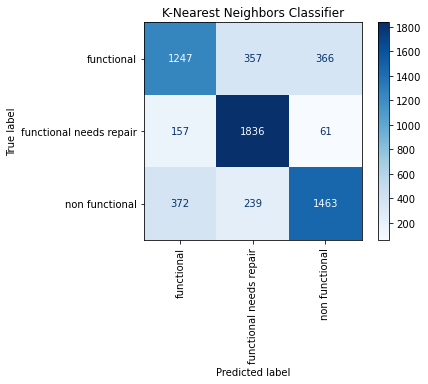

In [73]:
#Plot a confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(KNN, X_test, y_test)

disp = plot_confusion_matrix(KNN, X_test, y_test,
                             cmap=plt.cm.Blues,
                             xticks_rotation='vertical')
disp.ax_.set_title('K-Nearest Neighbors Classifier')

print(disp.confusion_matrix)

Comments:
The K-Nearest Neighbors classifier doesn't seem to perform that well in all the  three categories. The performance metrics for the test data is worse than it is for the training data, especially for the 'functional needs repair' category. This perhaps hints at overfitting. If the f-1 score for the 'functional needs repairs' category is low for all models, I would need to pay more attention to the recall score of this category which I believe is a little more imporant than the precision score is for our purpose. 

After running the baseline model I will be hypertuning models using GridSearchCv to see how they perform.

#### Now we will run K-Nearest Neighbors using GridSearchCV.

In [74]:
from sklearn.model_selection import GridSearchCV


In [76]:
param_grid = {
    'n_neighbors' :[1,5,10], # default 5
    'weights': ['uniform','distance'], #default uniform
    'metric':['eculidean','manhattan']
}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid,verbose =1, cv = 3,scoring ='accuracy',n_jobs = -1)
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 11.4min finished


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['eculidean', 'manhattan'],
                         'n_neighbors': [1, 5, 10],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_params_

In [77]:
#tuned knn
knn_tuned = KNeighborsClassifier(n_neighbors = 10,weights ='distance',leaf_size =10)
knn_tuned.fit(X_train,y_train)

KNeighborsClassifier(leaf_size=10, n_neighbors=10, weights='distance')

In [78]:
#predicting 
test_pred = knn_tuned.predict(X_test)
train_pred = knn_tuned.predict(X_train)

In [137]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
print(metrics.accuracy_score(y_test, test_pred))
#Print Classification Report
print('Training Data')
print(classification_report(y_train, train_pred))
print('\n')
print('Testing Data')
print(classification_report(y_test, test_pred))
# Update the scores dataframe
calculate_scores('K-Nearest Neighbor tuned', y_test, test_pred)

0.8261725155788783
Training Data
                         precision    recall  f1-score   support

             functional       0.81      0.88      0.84      6160
functional needs repair       0.89      0.93      0.91      6076
         non functional       0.91      0.80      0.85      6056

               accuracy                           0.87     18292
              macro avg       0.87      0.87      0.87     18292
           weighted avg       0.87      0.87      0.87     18292



Testing Data
                         precision    recall  f1-score   support

             functional       0.76      0.83      0.79      1970
functional needs repair       0.86      0.91      0.88      2054
         non functional       0.87      0.74      0.80      2074

               accuracy                           0.83      6098
              macro avg       0.83      0.83      0.83      6098
           weighted avg       0.83      0.83      0.83      6098



[[1356  290  324]
 [ 136 1864   54]
 [ 341  182 1551]]


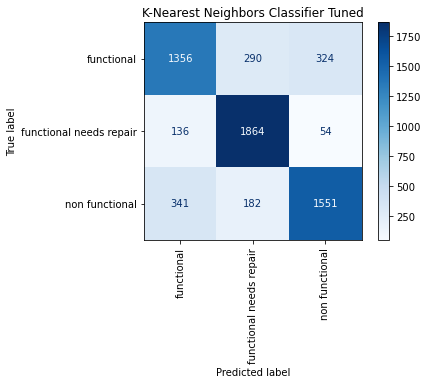

In [81]:
#Plot a confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(KNN, X_test, y_test)

disp = plot_confusion_matrix(knn_tuned, X_test, y_test,
                             cmap=plt.cm.Blues,
                             xticks_rotation='vertical')
disp.ax_.set_title('K-Nearest Neighbors Classifier Tuned')

print(disp.confusion_matrix)

Comments: Knn tuned is performing better than the base one in terms to accuracy as well as precision.The no of false  positives is less in knn_tuned, for functional needs repair and non functionals are less.

### Decision Tree Classifier

The next model we will be taking a look is a single Decision Tree Classifier. I will be performing a grid search for criterion, max_depth, min_samples_split and also min_samples_leaf.

In [82]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, random_state = 123)

In [84]:
# Create the classifier, fit it on the training data and make predictions on the test set
decision_treeclf = DecisionTreeClassifier(criterion='entropy')

decision_treeclf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [85]:
test_pred = decision_treeclf.predict(X_test)
train_pred = decision_treeclf.predict(X_train)

In [86]:
print(metrics.accuracy_score(y_test, test_pred))
#Print Classification Report
print('Training Data')
print(classification_report(y_train, train_pred))
print('\n')
print('Testing Data')
print(classification_report(y_test, test_pred))
# Update the scores dataframe
calculate_scores('Decision Tree', y_test, test_pred)

0.7940308297802559
Training Data
                         precision    recall  f1-score   support

             functional       0.95      0.97      0.96      6160
functional needs repair       0.96      0.98      0.97      6076
         non functional       0.99      0.95      0.97      6056

               accuracy                           0.97     18292
              macro avg       0.97      0.97      0.97     18292
           weighted avg       0.97      0.97      0.97     18292



Testing Data
                         precision    recall  f1-score   support

             functional       0.74      0.76      0.75      1970
functional needs repair       0.85      0.87      0.86      2054
         non functional       0.80      0.74      0.77      2074

               accuracy                           0.79      6098
              macro avg       0.79      0.79      0.79      6098
           weighted avg       0.79      0.79      0.79      6098



[[1503  177  290]
 [ 159 1796   99]
 [ 382  149 1543]]


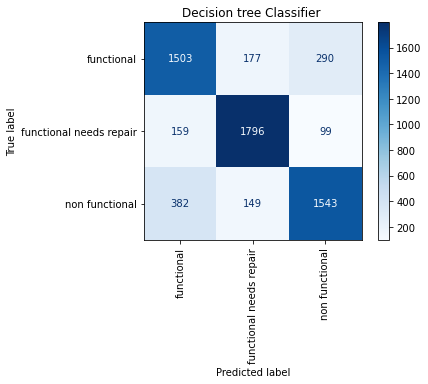

In [87]:
#Plot a confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(KNN, X_test, y_test)

disp = plot_confusion_matrix(decision_treeclf, X_test, y_test,
                             cmap=plt.cm.Blues,
                             xticks_rotation='vertical')
disp.ax_.set_title('Decision tree Classifier ')

print(disp.confusion_matrix)

Decision Tree has performed better than Knn_Tuned in terms of accuracy but in terms of precision and no of false positives, there doesn't seems much improvement.So, we will be tuning it using GridsearchCV to see if those numbers change.

#### Hyperparameter Tuning of Decision Tree Classifier Using GridSearchCV:

In [89]:
#Hypertuning Decision_Tree
dt_clf = DecisionTreeClassifier()

dt_cv_score = cross_val_score(dt_clf, X_train, y_train, cv=3)
mean_dt_cv_score = np.mean(dt_cv_score)

print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")

Mean Cross Validation Score: 76.96%


In [90]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}
# Instantiate GridSearchCV
dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=3, return_train_score=True)

# Fit to the data
dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True)

In [91]:
# Mean training score
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

# Mean test score
dt_gs_testing_score = dt_grid_search.score(X_test, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 60.86%
Mean Test Score: 79.27%
Best Parameter Combination Found During Grid Search:


{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [92]:
test_pred = dt_grid_search.predict(X_test)
train_pred = dt_grid_search.predict(X_train)

In [93]:
print(metrics.accuracy_score(y_test, test_pred))
#Print Classification Report
print('Training Data')
print(classification_report(y_train, train_pred))
print('\n')
print('Testing Data')
print(classification_report(y_test, test_pred))
# Update the scores dataframe
calculate_scores('Decision Tree tuned', y_test, test_pred)

0.7927189242374549
Training Data
                         precision    recall  f1-score   support

             functional       0.95      0.97      0.96      6160
functional needs repair       0.96      0.98      0.97      6076
         non functional       0.99      0.95      0.97      6056

               accuracy                           0.97     18292
              macro avg       0.97      0.97      0.97     18292
           weighted avg       0.97      0.97      0.97     18292



Testing Data
                         precision    recall  f1-score   support

             functional       0.74      0.76      0.75      1970
functional needs repair       0.84      0.87      0.86      2054
         non functional       0.79      0.75      0.77      2074

               accuracy                           0.79      6098
              macro avg       0.79      0.79      0.79      6098
           weighted avg       0.79      0.79      0.79      6098



[[1501  166  303]
 [ 157 1783  114]
 [ 361  163 1550]]


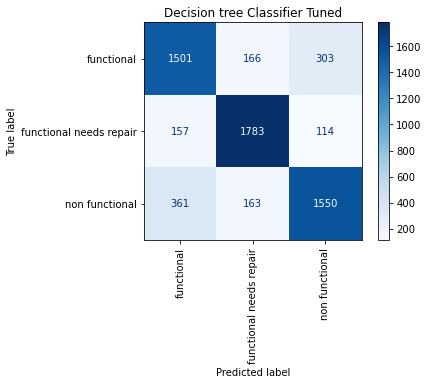

In [95]:
#Plot a confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(KNN, X_test, y_test)

disp = plot_confusion_matrix(dt_grid_search, X_test, y_test,
                             cmap=plt.cm.Blues,
                             xticks_rotation='vertical')
disp.ax_.set_title('Decision tree Classifier Tuned')

print(disp.confusion_matrix)

Decision Tree classifier_Tuned accuracy score is same as the base Decision Tree,doesn't show much improvement.

We will try another classifier.

### Random Forest Classifier:

In [96]:
#Instantiate RandomForest Classifier
forest = RandomForestClassifier()

In [98]:
#Use GridSerchCV to determine best parameters
rf_param_grid = {'n_estimators': [100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 5] }

#Instantiate GridSearchCV()
rf_grid_search = GridSearchCV(forest, rf_param_grid, cv = 3,n_jobs = -1)

#Fit to the data
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6], 'min_samples_leaf': [2, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]})

In [342]:
rf_grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 200}

In [99]:
rf_tuned = RandomForestClassifier(n_estimators = 500,max_depth = 6,min_samples_leaf =2,min_samples_split =5)
rf_tuned.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=500)

In [100]:
test_pred = rf_tuned.predict(X_test)
train_pred = rf_tuned.predict(X_train)

In [101]:
print(metrics.accuracy_score(y_test, test_pred))
#Print Classification Report
print('Training Data')
print(classification_report(y_train, train_pred))
print('\n')
print('Testing Data')
print(classification_report(y_test, test_pred))
# Update the scores dataframe
calculate_scores('Random forest Classifier', y_test, test_pred)

0.6564447359790095
Training Data
                         precision    recall  f1-score   support

             functional       0.67      0.67      0.67      6160
functional needs repair       0.65      0.79      0.71      6076
         non functional       0.70      0.55      0.61      6056

               accuracy                           0.67     18292
              macro avg       0.67      0.67      0.66     18292
           weighted avg       0.67      0.67      0.66     18292



Testing Data
                         precision    recall  f1-score   support

             functional       0.64      0.66      0.65      1970
functional needs repair       0.65      0.79      0.71      2054
         non functional       0.69      0.52      0.59      2074

               accuracy                           0.66      6098
              macro avg       0.66      0.66      0.65      6098
           weighted avg       0.66      0.66      0.65      6098



[[1331  370  269]
 [ 357 1496  201]
 [ 520  333 1221]]


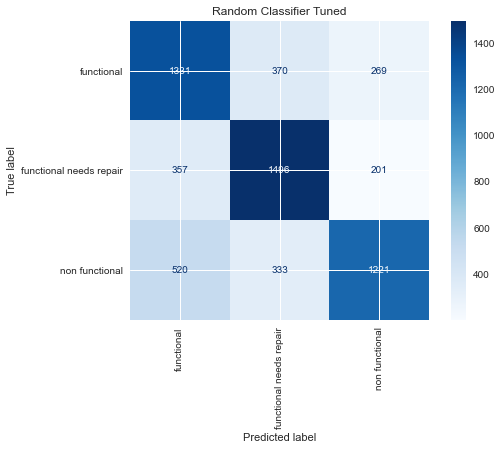

In [346]:
#Plot a confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(KNN, X_test, y_test)

disp = plot_confusion_matrix(rf_tuned, X_test, y_test,
                             cmap=plt.cm.Blues,
                             xticks_rotation='vertical')
disp.ax_.set_title('Random Classifier Tuned')

print(disp.confusion_matrix)

Random forest is not peforming well for accuracy nor for the precision.

### We will try XG BOOST:

In [105]:
from xgboost import XGBClassifier

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, random_state = 123)

In [114]:
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]


In [115]:
baselinexgb = XGBClassifier()
baselinexgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [120]:
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test.columns.values]


train_pred = baselinexgb.predict(X_train)
test_pred = baselinexgb.predict(X_test)

In [122]:
print(metrics.accuracy_score(y_test, test_pred))
#Print Classification Report
print('Training Data')
print(classification_report(y_train, train_pred))
print('\n')
print('Testing Data')
print(classification_report(y_test, test_pred))
# Update the scores dataframe
calculate_scores('XGBClassifier', y_test, test_pred)

0.8261725155788783
Training Data
                         precision    recall  f1-score   support

             functional       0.81      0.88      0.84      6160
functional needs repair       0.89      0.93      0.91      6076
         non functional       0.91      0.80      0.85      6056

               accuracy                           0.87     18292
              macro avg       0.87      0.87      0.87     18292
           weighted avg       0.87      0.87      0.87     18292



Testing Data
                         precision    recall  f1-score   support

             functional       0.76      0.83      0.79      1970
functional needs repair       0.86      0.91      0.88      2054
         non functional       0.87      0.74      0.80      2074

               accuracy                           0.83      6098
              macro avg       0.83      0.83      0.83      6098
           weighted avg       0.83      0.83      0.83      6098



[[1640  147  183]
 [ 141 1859   54]
 [ 389  146 1539]]


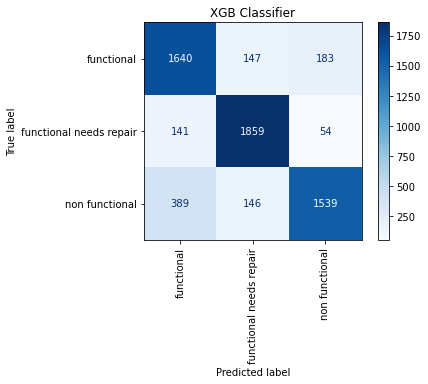

In [125]:
disp = plot_confusion_matrix(baselinexgb, X_test, y_test,
                             cmap=plt.cm.Blues,
                             xticks_rotation='vertical')
disp.ax_.set_title('XGB Classifier')

print(disp.confusion_matrix)

XGBoost is performing better than Random forest and decision Trees in terms of accuracy and precision.Since we are focussing more on lowering the no of false positives XGBoost performs better than KNN.

### Comparing all the model scores:

XGBoost performed the best in terms of it's precision and accuracy.

# Improvements

Since using GridSearchCV take up a lot of computational time, I couldn't put in more parameters like I wanted. Searching out more parameters might improve the model performance.

The model ability to predict non-functional needs repair is still lacking. I could try scrubbing the data in a diffrent way to make the model better.

Try out different types of filling missing values to see if it improves the model.

Instead of dropping the categorical variables like permit,and other duplicate columns we can find better ways to handle those data.

# Next Steps:
We suggest adding using government oversight to make sure wells are installed at lower levels where possible.

Our recommendation is to setup a new fund / organisation to review and repair older wells in cooperation with non-governmental organisations assisting with wells construction.

Payment is a large issues especially when the average monthly salary in Tanzania is $50.
- Financial support systems from local government areas or districs in addition to payment arrangements in place is crucial to driving a reliable water system.
- Providing more continous data will be more helpful.